In [63]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, learning_curve
import warnings
warnings.filterwarnings('ignore')

In [64]:
#loading the dataset and keeping 10k rows from the dataset
df=pd.read_csv("bank-full.csv", sep=";")
df = df.sample(n=10000, random_state=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3610,42,blue-collar,married,primary,no,2519,yes,no,unknown,15,may,262,4,-1,0,unknown,no
11677,37,technician,married,secondary,no,2209,no,no,unknown,20,jun,167,2,-1,0,unknown,no
33018,32,admin.,married,secondary,no,923,yes,no,cellular,17,apr,819,4,-1,0,unknown,no
44323,53,blue-collar,married,primary,no,306,no,no,cellular,28,jul,388,3,181,1,success,yes
8119,32,technician,single,tertiary,no,257,yes,no,unknown,2,jun,183,5,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,53,management,married,tertiary,no,3443,yes,no,unknown,28,may,48,2,-1,0,unknown,no
33270,34,blue-collar,single,secondary,no,13683,yes,no,cellular,20,apr,92,3,321,3,failure,no
29974,43,admin.,single,secondary,no,6,no,no,cellular,4,feb,58,1,264,1,failure,no
38541,40,blue-collar,married,secondary,no,1145,yes,no,cellular,15,may,175,4,-1,0,unknown,no


In [65]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 3610 to 3185
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10000 non-null  int64 
 1   job        10000 non-null  object
 2   marital    10000 non-null  object
 3   education  10000 non-null  object
 4   default    10000 non-null  object
 5   balance    10000 non-null  int64 
 6   housing    10000 non-null  object
 7   loan       10000 non-null  object
 8   contact    10000 non-null  object
 9   day        10000 non-null  int64 
 10  month      10000 non-null  object
 11  duration   10000 non-null  int64 
 12  campaign   10000 non-null  int64 
 13  pdays      10000 non-null  int64 
 14  previous   10000 non-null  int64 
 15  poutcome   10000 non-null  object
 16  y          10000 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [66]:
#checking for null values if any
print(df.isnull().sum())
df = df.dropna()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [67]:
#encoding categorical data to numeric data
encoder = LabelEncoder()
for cols in df.columns.tolist():
  if(df[cols].dtype== 'object'):
    df[cols] = encoder.fit_transform(df[cols])

In [68]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3610,42,1,1,0,0,2519,1,0,2,15,8,262,4,-1,0,3,0
11677,37,9,1,1,0,2209,0,0,2,20,6,167,2,-1,0,3,0
33018,32,0,1,1,0,923,1,0,0,17,0,819,4,-1,0,3,0
44323,53,1,1,0,0,306,0,0,0,28,5,388,3,181,1,2,1
8119,32,9,2,2,0,257,1,0,2,2,6,183,5,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,53,4,1,2,0,3443,1,0,2,28,8,48,2,-1,0,3,0
33270,34,1,2,1,0,13683,1,0,0,20,0,92,3,321,3,0,0
29974,43,0,2,1,0,6,0,0,0,4,3,58,1,264,1,0,0
38541,40,1,1,1,0,1145,1,0,0,15,8,175,4,-1,0,3,0


In [69]:
#using standardscaler
X=df.drop("y", axis=1)
Y=df["y"]
sc=StandardScaler()
X_scaled= sc.fit_transform(X)

In [70]:
X_scaled

array([[ 0.10080859, -1.03551567, -0.27033567, ..., -0.41638035,
        -0.30638414,  0.44885575],
       [-0.36876749,  1.40565874, -0.27033567, ..., -0.41638035,
        -0.30638414,  0.44885575],
       [-0.83834357, -1.34066248, -0.27033567, ..., -0.41638035,
        -0.30638414,  0.44885575],
       ...,
       [ 0.19472381, -1.34066248,  1.38208285, ...,  2.22647489,
         0.22122761, -2.57103046],
       [-0.08702184, -1.03551567, -0.27033567, ..., -0.41638035,
        -0.30638414,  0.44885575],
       [ 0.10080859, -0.12007527, -0.27033567, ..., -0.41638035,
        -0.30638414,  0.44885575]])

In [71]:
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best c', 'Best gamma'])

In [90]:
#function to find the best parameters 
def svc_func(x_train,y_train,x_test,y_test):
        
    bestaccuracy=0
    bestkernel=""
    iterations=500
    kernellist=['rbf','linear','poly','sigmoid']

    for i in range(iterations):
      c=random.uniform(0,60)
      g=random.uniform(0.01,1)
      choice=random.sample(kernellist,1)
      svc=SVC(kernel=choice[0], C=c,gamma=g, max_iter=1000) 
      svc.fit(x_train,y_train)
      y_pred=svc.predict(x_test)
      accuracy=accuracy_score(y_pred,y_test)
      if(accuracy>bestaccuracy):
        bestc=c
        bestg=g
        bestchoice=choice[0]
        bestaccuracy=accuracy
    return bestc, bestg, bestchoice,bestaccuracy   

In [91]:
# Assuming your dataset is stored in X and y variables
#each sample has 1000 rows whose best parameters are calculated over 500 iterations
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled[1000*i:1000*(i+1)], Y[1000*i:1000*(i+1)], test_size=0.3, random_state=0)
    bestc, bestg, bestchoice,bestaccuracy=svc_func(X_train,y_train,X_test,y_test)
    print(bestaccuracy, bestchoice, bestc, bestg)
    result.loc[i] = [i+1, bestaccuracy, bestchoice, bestc, bestg]

0.9233333333333333 poly 30.375176097587737 0.03717061328200421
0.8866666666666667 poly 42.63953345183313 0.022289145552033755
0.89 rbf 0.37894802862496135 0.4797099089421583
0.86 rbf 11.02229087869297 0.1109478635771111
0.93 linear 2.3964149732350304 0.8257488341802381
0.9033333333333333 rbf 20.984094402145686 0.042917780175911066
0.8933333333333333 rbf 2.9847279772495527 0.08076350060003037
0.9066666666666666 linear 3.247040735617295 0.13740786022817095
0.9133333333333333 rbf 4.064076142607471 0.022075499310946267
0.86 rbf 21.609938579987848 0.09002482323217348


In [94]:
result

,Sample,Best Accuracy,Best Kernel,Best c,Best gamma
0,1,0.923333,poly,30.375176,0.037171
1,2,0.886667,poly,42.639533,0.022289
2,3,0.890000,rbf,0.378948,0.479710
3,4,0.860000,rbf,11.022291,0.110948
4,5,0.930000,linear,2.396415,0.825749
5,6,0.903333,rbf,20.984094,0.042918
6,7,0.893333,rbf,2.984728,0.080764
7,8,0.906667,linear,3.247041,0.137408
8,9,0.913333,rbf,4.064076,0.022075
9,10,0.860000,rbf,21.609939,0.090025


In [95]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best c'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best gamma'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

In [96]:
train_sizes

array([  6,  19,  31,  44,  57,  69,  82,  95, 108, 120, 133, 146, 159,
       171, 184, 197, 209, 222, 235, 248, 260, 273, 286, 299, 311, 324,
       337, 349, 362, 375, 388, 400, 413, 426, 439, 451, 464, 477, 489,
       502, 515, 528, 540, 553, 566, 579, 591, 604, 617, 630])

In [98]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [99]:
train_mean

array([1.        , 1.        , 1.        , 0.94090909, 0.89122807,
       0.93188406, 0.93780488, 0.92947368, 0.93796296, 0.92666667,
       0.92481203, 0.91917808, 0.9327044 , 0.92748538, 0.92554348,
       0.92081218, 0.92009569, 0.91306306, 0.91914894, 0.90846774,
       0.91230769, 0.91758242, 0.91748252, 0.909699  , 0.90836013,
       0.90679012, 0.91068249, 0.90888252, 0.91077348, 0.9112    ,
       0.90902062, 0.9155    , 0.91331719, 0.91525822, 0.91571754,
       0.91529933, 0.91788793, 0.91823899, 0.91431493, 0.91573705,
       0.91495146, 0.91382576, 0.9137037 , 0.91627486, 0.91413428,
       0.91433506, 0.91641286, 0.91440397, 0.91329011, 0.9115873 ])

In [100]:
test_mean

array([0.73142857, 0.83285714, 0.77571429, 0.82571429, 0.83714286,
       0.83571429, 0.83857143, 0.86428571, 0.87857143, 0.88285714,
       0.88571429, 0.88142857, 0.88142857, 0.89714286, 0.89571429,
       0.89      , 0.89285714, 0.89857143, 0.89428571, 0.90714286,
       0.90428571, 0.89571429, 0.9       , 0.89857143, 0.89571429,
       0.90285714, 0.90285714, 0.90142857, 0.9       , 0.90571429,
       0.90571429, 0.90571429, 0.90285714, 0.90285714, 0.90428571,
       0.90571429, 0.90571429, 0.90714286, 0.91142857, 0.89857143,
       0.90428571, 0.90428571, 0.90857143, 0.90428571, 0.90571429,
       0.90714286, 0.90428571, 0.90428571, 0.90428571, 0.90714286])

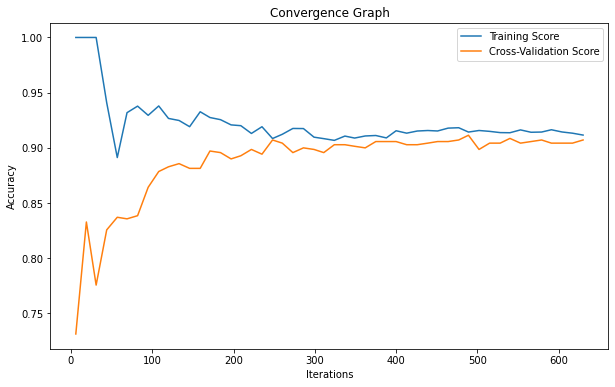

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()
     